In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing data

Datasource:

https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=120.EXR.D.HUF.EUR.SP00.A

In [96]:
df = pd.read_csv("amCharts2022.csv")
df.head()

,date,conf,status1,s1,s1zz
0,03/01/2022,NaN,Normal value,367.71,NaN
1,04/01/2022,NaN,Normal value,365.12,NaN
2,05/01/2022,NaN,Normal value,362.15,NaN
3,06/01/2022,NaN,Normal value,359.84,NaN
4,07/01/2022,NaN,Normal value,358.68,NaN


### Basic Data Processing

Rename columns and format the date object

In [97]:
df.drop(["conf", "status1", "s1zz"], axis=1, inplace=True)
df.head()

,date,s1
0,03/01/2022,367.71
1,04/01/2022,365.12
2,05/01/2022,362.15
3,06/01/2022,359.84
4,07/01/2022,358.68


In [98]:
df.shape

(163, 2)

In [99]:
new_col_names = ['Time', 'HufEur']
df.columns = new_col_names

In [100]:
#dropping possible NaN values
df = df.dropna()
df.shape

(163, 2)

In [101]:
df['Time'] = pd.to_datetime(df['Time'])
df.dtypes

Time      datetime64[ns]
HufEur           float64
dtype: object

In [102]:
#setting the index as the Time for timeseries analysis
daily_data = df[["Time", "HufEur"]]
daily_data.set_index("Time", inplace=True)
daily_data.head()

,HufEur
Time,
2022-03-01,367.71
2022-04-01,365.12
2022-05-01,362.15
2022-06-01,359.84
2022-07-01,358.68


<AxesSubplot:xlabel='Time'>

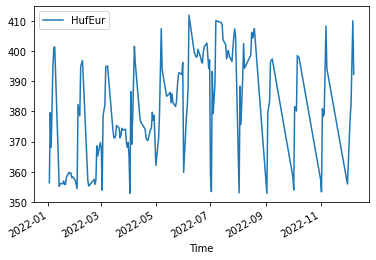

In [103]:
daily_data.plot()

# Data Exploration

Checking if the timeseries is stationary or not

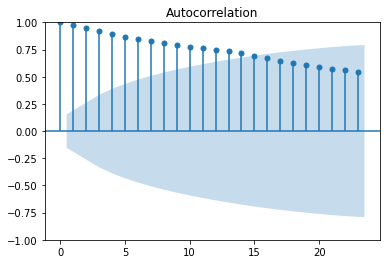

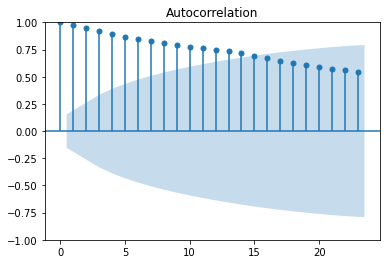

In [104]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_data)

Based on the autocorrelation plot our timeseries on not stationary

In [105]:
# converting series into statinary
exchange_diff = daily_data.diff(periods=1) #integrated order of 1
exchange_diff = exchange_diff[1:]
exchange_diff.head()

,HufEur
Time,
2022-04-01,-2.59
2022-05-01,-2.97
2022-06-01,-2.31
2022-07-01,-1.16
2022-10-01,-0.28


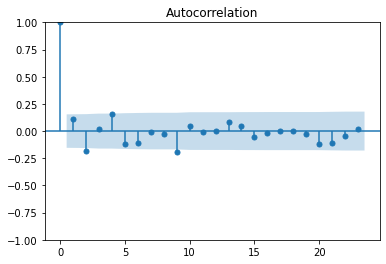

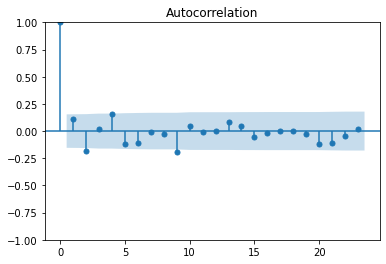

In [106]:
plot_acf(exchange_diff)

One degree of difference is already showing huge improvements

<AxesSubplot:xlabel='Time'>

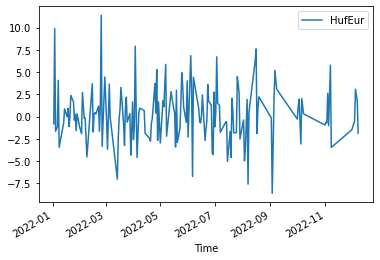

In [107]:
exchange_diff.plot()

In [108]:
exchange_diff.size

162

### Modelling

AutoRegression

In [115]:
#Splitting the data into training and testing set
X = daily_data.values
train = X[0:152]
test = X[153:]

In [116]:
test.size, train.size

(10, 152)

AR Model

In [126]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

model_ar = AutoReg(train, lags=10)
model_ar_fit = model_ar.fit()


In [127]:
model_ar_fit.predict(start=153, end=162)

array([395.18130905, 395.10236162, 395.78341652, 396.80287978,
       397.67823812, 398.64625152, 399.05329836, 398.95325231,
       398.93847038, 399.1520479 ])

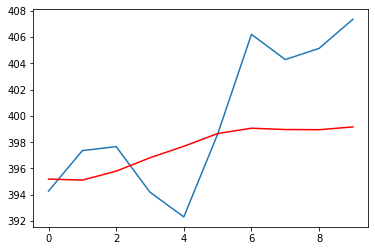

In [128]:
plt.plot(test)
plt.plot(model_ar_fit.predict(start=153, end=162).tolist(), color="red")

ARIMA Model

In [129]:
from statsmodels.tsa.arima.model import ARIMA

Trying to find the best values for our p,d,q

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
aics = []
for param in pdq:
    try:
        model_arima2 = ARIMA(train,order=param)
        model_arima_fit2 = model_arima2.fit()
        aics.append(model_arima_fit2.aic)
        print(param,model_arima_fit2.aic)
    except:
        continue
    

(0, 0, 0) 1296.7456213702699
(0, 0, 1) 1125.2022661228366
(0, 0, 2) 1008.9675252034024
(0, 0, 3) 938.6682269185147
(0, 0, 4) 906.9043598750078
(0, 1, 0) 772.3090912352111
(0, 1, 1) 771.6818545895609
(0, 1, 2) 771.1299668721451
(0, 1, 3) 772.7929023321332
(0, 1, 4) 771.1741000639161
(0, 2, 0) 854.4932277351622
(0, 2, 1) 774.6723388865887
(0, 2, 2) 773.9063802466242
(0, 2, 3) 773.4757472925631
(0, 2, 4) 775.1399555353655
(0, 3, 0) 998.2215130437104
(0, 3, 1) 856.81322831496
(0, 3, 2) 783.8684642913331
(0, 3, 3) 782.5724174921284
(0, 3, 4) 782.6101688144443
(0, 4, 0) 1159.1258526781048
(0, 4, 1) 999.5345258266527
(0, 4, 2) 863.8477537810766
(0, 4, 3) 798.9892110661619
(0, 4, 4) 797.7318002705792
(1, 0, 0) 783.2434336450737
(1, 0, 1) 782.2001118945385
(1, 0, 2) 782.0752500906686
(1, 0, 3) 783.8833121434602
(1, 0, 4) 781.4302290901081
(1, 1, 0) 772.5207657451257
(1, 1, 1) 772.4310935394913
(1, 1, 2) 773.0608355959546
(1, 1, 3) 770.5542420100339
(1, 1, 4) 772.973014221848
(1, 2, 0) 836.32203

In [ ]:
min(aics)

764.6173696320816

Based on the values order=(2, 1, 2) would provide the lowest AIC value

In [173]:
model_arima = ARIMA(train, order=(2, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

764.6173696320816


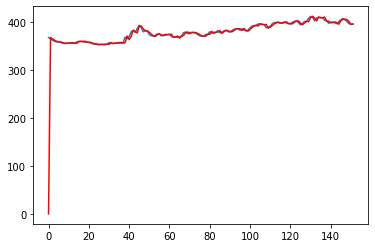

In [174]:
plt.plot(train)
plt.plot(model_arima_fit.predict(), color="red")

In [175]:
model_arima_fit.forecast(steps=10)

array([396.72231714, 395.5693321 , 395.90342765, 396.60734146,
       395.73122   , 395.86569481, 396.50080337, 395.85286581,
       395.85453878, 396.40631268])

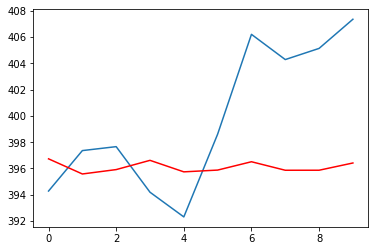

In [176]:
plt.plot(test)
plt.plot(model_arima_fit.forecast(steps=10), color="red")

In [177]:
mean_squared_error(test, model_arima_fit.forecast(steps=10))

40.82663134673915

In [178]:
model_arima_fit.forecast(steps=1)

array([396.72231714])